CS189_HW1

Setup

In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import svm
from scipy import io
mnist_data = {}
spam_data = {}
cifar10_data = {}
all_data = {"mnist":mnist_data, "spam":spam_data, "cifar10":cifar10_data}
for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        all_data[data_name][field] = data[field]
        print(field, data[field].shape)




loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


Data seperation, nmist

In [2]:
def partition(dataset,split):
    np.random.shuffle(dataset)
    validation_set = dataset[:split,:]
    training_set = dataset[split:,:]
    validation_set_sample = validation_set[:,:-1]
    validation_set_label = validation_set[:,-1:].ravel()
    training_set_sample = training_set[:,:-1]
    training_set_label = training_set[:,-1:].ravel()
    return validation_set_sample,validation_set_label,training_set_sample,training_set_label

In [3]:
nmist_test_set = mnist_data["test_data"]
print(nmist_test_set.shape)
nmist_dataset = np.concatenate((mnist_data["training_data"],mnist_data["training_labels"]),axis=1)
nmist_validation_set_sample,nmist_validation_set_label,nmist_training_set_sample,nmist_training_set_label = partition(nmist_dataset,10000)
print(nmist_validation_set_sample.shape)

(10000, 784)
(10000, 784)


Data seperation, spam

In [20]:
spam_test_set = mnist_data["test_data"]
spam_dataset = np.concatenate((spam_data["training_data"],spam_data["training_labels"]),axis=1)
split_amount = int(spam_data["training_data"].shape[0]*0.2)
spam_validation_set_sample,spam_validation_set_label,spam_training_set_sample,spam_training_set_label = partition(spam_dataset,split_amount)
spam_training_set_label
print(spam_data["training_data"].shape)

print(spam_validation_set_sample.shape)
print(spam_validation_set_label.shape)
print(spam_training_set_sample.shape)
print(spam_training_set_label.shape)

(5172, 33)
(5172, 32)
(1034, 32)
(1034,)
(4138, 32)
(4138,)


data seperation, cifar10

In [5]:
cifar10_test_set = cifar10_data["test_data"]
cifar10_dataset = np.concatenate((cifar10_data["training_data"],cifar10_data["training_labels"]),axis=1)
cifar10_validation_set_sample,cifar10_validation_set_label,cifar10_training_set_sample,cifar10_training_set_label = partition(cifar10_dataset,5000)
cifar10_training_set_label

array([4, 9, 1, ..., 7, 3, 8])

SVM

Mnist

In [6]:
def get_accuracy(model,size,train_sample,train_label,test_X,test_Y):
    train_X =train_sample[:size,]
    train_Y =train_label[:size]
    model.fit(train_X, train_Y)
    return accuracy_score(model.predict(test_X),test_Y)



step_nmist = [100,200,500,1000,2000,5000,10000]
model_nmist = svm.SVC(kernel='linear',gamma='auto',cache_size=3000)
error_rate_nmist = [1-get_accuracy(model_nmist,i,nmist_training_set_sample,nmist_training_set_label,nmist_validation_set_sample,\
                             nmist_validation_set_label) for i in step_nmist]##error rate

# print("Accuracy: {}%".format(accuracy_score(model.predict(nmist_validation_set_sample),nmist_validation_set_label)*100))

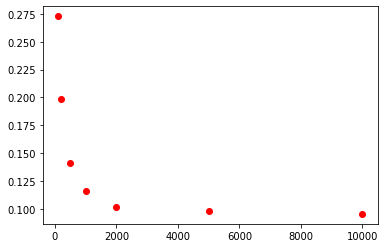

In [7]:
plt.plot(step_nmist,error_rate_nmist,'ro')

In [62]:
step_spam = [100,200,500,1000,2000,len(spam_training_set_sample)]
model_spam = svm.SVC(kernel='poly',gamma='auto',cache_size=3000)
error_rate_spam = [1-get_accuracy(model_spam,i,spam_training_set_sample,spam_training_set_label,spam_validation_set_sample,\
                             spam_validation_set_label) for i in step_spam]##error rate

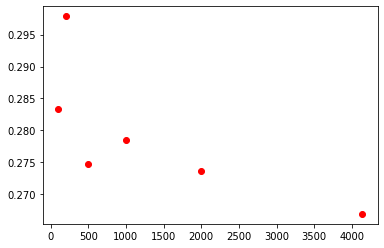

In [63]:
plt.plot(step_spam,error_rate_spam,'ro')

In [28]:
step_cifar10 = [100,200,500,1000,2000,5000]
model_cifar10 = svm.SVC(kernel='poly',gamma='auto',cache_size=3000)
error_rate_cifar10 = [1-get_accuracy(model_cifar10,i,cifar10_training_set_sample,cifar10_training_set_label,cifar10_validation_set_sample,\
                             cifar10_validation_set_label) for i in step_cifar10]##error rate

KeyboardInterrupt: 

In [ ]:
plt.plot(step,error_rate_3,'ro')


In [29]:
ls = []
i = 1E-10
while i<1:
    ls = ls + [i]
    i = i*1000
model_ls = [svm.SVC(kernel='linear',gamma='auto',cache_size=3000,C=i) for i in ls]
print(model_ls)
accuracy_ls = [get_accuracy(i,10000,nmist_training_set_sample,nmist_training_set_label,nmist_validation_set_sample,\
                             nmist_validation_set_label) for i in model_ls]
print(accuracy_ls)

[SVC(C=1e-10, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=1.0000000000000001e-07, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=0.0001, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=0.1, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
[0.1124, 0.9229, 0.9052, 0.9049

In [34]:
ls = []
i = 1E-8
while i<0.0001:
    ls = ls + [i]
    i = i*100
model_ls = [svm.SVC(kernel='linear',gamma='auto',cache_size=3000,C=i) for i in ls]
print(model_ls)
accuracy_ls = [get_accuracy(i,10000,nmist_training_set_sample,nmist_training_set_label,nmist_validation_set_sample,\
                             nmist_validation_set_label) for i in model_ls]
print(accuracy_ls)

[SVC(C=1e-08, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=1e-06, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=9.999999999999999e-05, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
[0.8924, 0.9287, 0.9052]


In [35]:
ls = [5e-05,3e-06,8e-06]
model_ls = [svm.SVC(kernel='linear',gamma='auto',cache_size=3000,C=i) for i in ls]
print(model_ls)
accuracy_ls = [get_accuracy(i,10000,nmist_training_set_sample,nmist_training_set_label,nmist_validation_set_sample,\
                             nmist_validation_set_label) for i in model_ls]
print(accuracy_ls)

[SVC(C=5e-05, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=3e-06, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=8e-06, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
[0.9069, 0.9221, 0.9139]


In [36]:
ls = [0.9e-05,1.1e-06,1.2e-06]
model_ls = [svm.SVC(kernel='linear',gamma='auto',cache_size=3000,C=i) for i in ls]
print(model_ls)
accuracy_ls = [get_accuracy(i,10000,nmist_training_set_sample,nmist_training_set_label,nmist_validation_set_sample,\
                             nmist_validation_set_label) for i in model_ls]
print(accuracy_ls)

[SVC(C=9e-06, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=1.1e-06, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), SVC(C=1.2e-06, cache_size=3000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)]
[0.9136, 0.9284, 0.9281]


In [56]:
def K_fold_partition(dataset,k):
    np.random.shuffle(dataset)
    part = int(len(dataset)/k)
    ls = []
    #three-way partition
    for i in range(k):
        left = dataset[0:part*i,]
        validation = dataset[part*i : part*(i+1),]
        right = dataset[part*(i+1):len(dataset),]
        training = np.concatenate((left,right),axis=0)
        ls.append((training[:,:-1],training[:,-1:].ravel(),validation[:,:-1],validation[:,-1:].ravel()))
    return ls
ls = K_fold_partition(spam_dataset,5)
print(ls[0][0].shape,ls[0][1].shape)

(4138, 32) (4138,)


In [58]:
model = svm.SVC(kernel='poly',gamma='auto',cache_size=3000,C=1)
i = K_fold_partition(spam_dataset,5)[0]
print(get_accuracy(model,len(i[0]),i[0],i[1],i[2],\
                             i[3]))

0.7504835589941973


In [64]:
model = svm.SVC(kernel='poly',gamma='auto',cache_size=3000,C=1)
def K_fold_validation(model,k):
    accuracy_ls = [get_accuracy(model,len(i[0]),i[0],i[1],i[2],\
                             i[3]) for i in K_fold_partition(spam_dataset,k)]
    return np.mean(accuracy_ls)
K_fold_validation(model,5)

0.7522243713733076

In [ ]:
step_ls = []
i = 1E-9
while i<1E3:
    step_ls = step_ls + [i]
    i = i*1000
model_ls = [svm.SVC(kernel='poly',gamma='auto',cache_size=3000,C=i) for i in step_ls]
print(model_ls)
accuracy = [K_fold_validation(model,5) for model in model_ls]
print(accuracy)